In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Урок 7

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], <br>ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br> Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$$\hat{y}=\beta_0+\beta_1\cdot x$$
* расчет коэффициентов линейной регрессии с использованием intercept
$$\beta_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$
$$\beta_0 = \overline{y} - \beta_1 \cdot {\overline{x}}.$$

In [4]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b1

2.620538882402765

In [5]:
b0 = np.mean(y) - b1 * np.mean(x)
b0

444.1773573243596

In [6]:
y_hat = b0 + b1*x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [7]:
x1 = x.reshape((10, 1))
x1 = np.hstack([np.ones((10, 1)), x1])
y1 = y.reshape((10, 1))
B = np.dot(np.linalg.inv(np.dot(x1.T, x1)), x1.T@y1)
B

array([[444.17735732],
       [  2.62053888]])

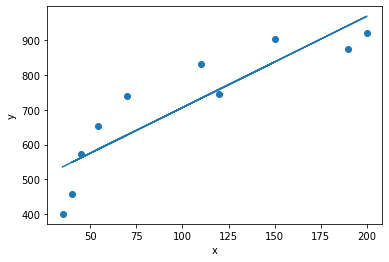

In [8]:
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* расчет коэффициентов линейной регрессии без использованием intercept ($\beta_0=0$)
$$\beta_0 = \overline{y} - \beta_1 \cdot {\overline{x}}\implies\beta_1=\frac{\overline{y}}{\overline{x}}$$

In [9]:
b_1 = np.mean(y) / np.mean(x)
b_1

7.000986193293885

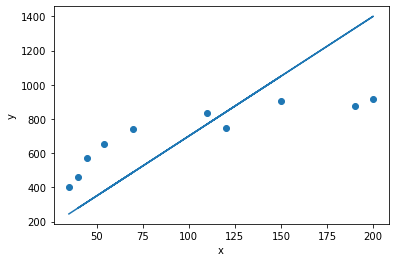

In [10]:
plt.scatter(x, y)
plt.plot(x, b_1 * x)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
x2 = x.reshape((10, 1))
y2 = y.reshape((10, 1))
B1 = np.dot(np.linalg.inv(np.dot(x2.T, x2)), x2.T@y2)
B1

array([[5.88982042]])

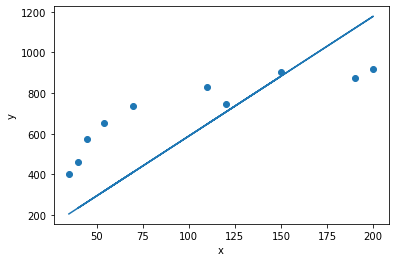

In [12]:
plt.scatter(x, y)
plt.plot(x2, B1 * x2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**В моих рассуждениях, что при $\beta_0=0$, $\beta_0 = \overline{y} - \beta_1 \cdot {\overline{x}}\implies\beta_1=\frac{\overline{y}}{\overline{x}}$ закралась ошибка. Надо разбираться.**

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
alpha = 1e-6
n = x.size
B1 = 0.1

In [14]:
def mse_(B1, y = y, x = x, n = 10):
    return np.sum((B1 * x - y)**2) / n

In [15]:
# Число итераций = 100

for i in range(100):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if (i % 10 == 0):
        print(f'i = {i:{2}};\t B1 = {round(B1, 10)};\t mse = {round(mse_(B1), 12)}')

i =  0;	 B1 = 0.25952808;	 mse = 493237.7212546963
i = 10;	 B1 = 1.6319792142;	 mse = 306275.7568040035
i = 20;	 B1 = 2.6698789607;	 mse = 199352.96411174876
i = 30;	 B1 = 3.4547782236;	 mse = 138204.25062502263
i = 40;	 B1 = 4.0483488986;	 mse = 103233.54824312925
i = 50;	 B1 = 4.4972296184;	 mse = 83233.94472982832
i = 60;	 B1 = 4.8366902911;	 mse = 71796.25222021657
i = 70;	 B1 = 5.0934033626;	 mse = 65255.0820486468
i = 80;	 B1 = 5.2875395509;	 mse = 61514.21323463749
i = 90;	 B1 = 5.4343527201;	 mse = 59374.825462025976


In [16]:
# Число итераций = 100
# Увеличим alpha в 10 раз

for i in range(100):
    B1 -= alpha * 10 * (2 / n) * np.sum((B1 * x - y) * x)
    if (i % 10 == 0):
        print(f'i = {i:{2}};\t B1 = {round(B1, 10)};\t mse = {round(mse_(B1), 12)}')

i =  0;	 B1 = 5.6332128554;	 mse = 57424.01228897413
i = 10;	 B1 = 5.8796001699;	 mse = 56518.29743000421
i = 20;	 B1 = 5.8894133647;	 mse = 56516.86069842159
i = 30;	 B1 = 5.8898042078;	 mse = 56516.85841934044
i = 40;	 B1 = 5.8898197744;	 mse = 56516.85841572515
i = 50;	 B1 = 5.8898203944;	 mse = 56516.85841571941
i = 60;	 B1 = 5.8898204191;	 mse = 56516.85841571941
i = 70;	 B1 = 5.8898204201;	 mse = 56516.85841571941
i = 80;	 B1 = 5.8898204201;	 mse = 56516.8584157194
i = 90;	 B1 = 5.8898204201;	 mse = 56516.85841571939


#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

* Таблица Лапласа используется в случаях, когда известна $\sigma$ генеральной совокупности
* Таблица критических значений t-критерия Стьюдента используется, когда не известна $\sigma$ генеральной совокупности 

#### 4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [17]:
alpha = 1e-5
n = x.size
B1 = 1
B0 = 100

In [18]:
def mse_(B0, B1, y = y, x = x, n = 10):
    return np.sum(((B0 + B1 * x) - y)**2) / n

In [19]:
# Число итераций = 6000000

for i in range(6000001):
    B0 -= alpha * (2 / n) * np.sum((B0 + B1 * x) - y)
    B1 -= alpha * (2 / n) * np.sum(((B0 + B1 * x) - y) * x)
    if (i % 1000000 == 0):
        print(f'i = {i:{6}};\t B0 = {round(B0, 10)};\t B1 = {round(B1, 10)};\t mse = {round(mse_(B0, B1), 12)}')

i =      0;	 B0 = 100.01017;	 B1 = 2.1444813752;	 mse = 161271.1043181803
i = 1000000;	 B0 = 442.0220113994;	 B1 = 2.6364031009;	 mse = 6471.592605589833
i = 2000000;	 B0 = 444.1638586086;	 B1 = 2.6206382384;	 mse = 6470.414247398292
i = 3000000;	 B0 = 444.1772727833;	 B1 = 2.6205395047;	 mse = 6470.414201178474
i = 4000000;	 B0 = 444.1773567949;	 B1 = 2.6205388863;	 mse = 6470.41420117666
i = 5000000;	 B0 = 444.1773573188;	 B1 = 2.6205388824;	 mse = 6470.414201176661
i = 6000000;	 B0 = 444.1773573188;	 B1 = 2.6205388824;	 mse = 6470.414201176661
